# Logistic Regression 

- Is a classifier

- How is it different from SVM?

    - SVM **can not** tell us how probable I am healthy. 
    - For example, if my Serotonin is 3 and my Dopamine is 6, what is the chance that I would be considered as healthy
   90 percent or 60 percent or etc.
    
- Logistic Regression can do it

## Watch a video about Logistic Regression

Lets watch this video: https://www.youtube.com/watch?v=yIYKR4sgzI8

## The Dataset We use for Logistic Regression

- Pima Indian Diabetes

- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

- In particular, all patients here are females at least 21 years old of Pima Indian heritage

- Labels: 1: diabetes, 0: no diabetes

## Activity: Obtain confusion matrix, accuracy, precision, recall for pima Diabetes dataset

Steps:

1- Load the dataset: `pd.read_csv('diabetes.csv')`

2- Use these features: `feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']`

3- Split the data to train and test: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

4- Instantiate logistic regression model

5- Obtain the statistics of `y_test`

6- Obtain the confuction matrix

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

pima = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

## Check the size of y_train

In [103]:
# check the size of y_train

print(len(y_train))
print(0.75*len(pima))

print(len(y_test))
print(0.25*len(pima))



576
576.0
192
192.0


## Build our classifier model with Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [9]:
print(y_test.values.T)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


## How many of samples in y_train have diabetes how many not?

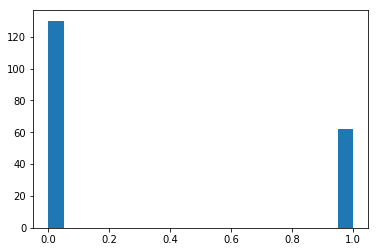

0    130
1     62
Name: Outcome, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(y_test, bins=20)
plt.show()

y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

## Activity: Write a function that calculates:

- How many of 0 (no diabetes) in y_test is predicted correctly as 0 (no diabetes) in y_pred?

- How many of 0 (no diabetes) in y_test is predicted incorrectly as 1 (diabetes) in y_pred?

- How many of 1 (diabetes) in y_test is predicted incorrectly as 0 (no diabetes) in y_pred?

- How many of 1 (diabetes) in y_test is predicted correctly 1 (diabetes) in y_pred?


In [96]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    conf_matrix  = np.zeros((2, 2))
    for m in [0, 1]:
        for n in [0, 1]:
            c = 0
            for (i, j) in zip(y_test, y_predict):
                if (i == m) & (j == n):
                        c += 1
            conf_matrix[m, n] = c 
    return conf_matrix

print(comp_yt_yp(y_test, y_pred))

[[118.  12.]
 [ 47.  15.]]


## Easier way to compute elements of Confusion Matrix

In [97]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


### Basic terminology

True Positives (TP): we correctly predicted that they do have diabetes: 15

True Negatives (TN): we correctly predicted that they don't have diabetes: 118

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error"): 12

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error"): 47

<img src="Images/confusion_matrix.png" width="500" height="500">

## The difference between `.predict()` and `.predict_proba` for a classifier

Apply these two methods to Pima Indian Diabetes dataset

https://www.ritchieng.com/machine-learning-evaluate-classification-model/